# Homework 5: Confidence Intervals, Autograders, Freethrows
***

**Name**: Corey Stephens

***

This assignment is due on Moodle by **5pm on Friday April 6th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [2]:
dfRed = pd.read_csv('data/winequality-red.csv', delimiter=';')
dfWhite = pd.read_csv('data/winequality-white.csv', delimiter=';')

In [3]:
dfRed['alcohol'].count()

1599

In [4]:
dfWhite['alcohol'].count()

4898

**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

The winequality-red.csv file contains nearly 1600 rows, and the winequality-white.csv file contains nearly 4900 rows, both of which are well within the range of 'large-n', so the Central Limit Theorem holds.

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

In [5]:
xbar_red = dfRed['alcohol'].mean()
zalpha = stats.norm.ppf(0.975)
stdev_red = dfRed['alcohol'].std()
rootn_red = np.sqrt(dfRed['alcohol'].count())
maxCI_red = xbar_red + zalpha*(stdev_red/rootn_red)
minCI_red = xbar_red - zalpha*(stdev_red/rootn_red)
print("[{:.3f}, {:.3f}]".format(minCI_red, maxCI_red))

[10.371, 10.475]


In [6]:
xbar_white = dfWhite['alcohol'].mean()
stdev_white = dfWhite['alcohol'].std()
rootn_white = np.sqrt(dfRed['alcohol'].count())
maxCI_white = xbar_white + zalpha*(stdev_white/rootn_white)
minCI_white = xbar_white + zalpha*(stdev_white/rootn_white)
print("[{:.3f}, {:.3f}]".format(minCI_white, maxCI_white))

[10.575, 10.575]


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

In [7]:
mean_diff = np.absolute(xbar_red - xbar_white)
std_diff = np.sqrt((stdev_red**2)/rootn_red**2 + (stdev_white)/rootn_white**2)
minCI_diff = mean_diff - zalpha*std_diff
maxCI_diff = mean_diff + zalpha*std_diff
print('[{:.3f}, {:.3f}]'.format(minCI_diff, maxCI_diff))

[0.016, 0.167]


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

Because the 95% CI does not contain $0$, we can say with a high degree of confidence that there is in fact a difference between the mean aclohol content of red and white wines.

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

In [8]:
A = 1204
B = 1099
O = 205
n = A + B + O
alpha = 0.05

Ap = A / n
Bp = B / n
Op = O / n

As = np.sqrt( (Ap * (1-Ap)) / n )
Bs = np.sqrt( (Bp * (1-Bp)) / n )
Os = np.sqrt( (Op * (1-Op)) / n )

zalpha = stats.norm.ppf(1-alpha/2)

Am = zalpha * As
Bm = zalpha * Bs
Om = zalpha * Os

print("Candidate A: {:.1f} ± {:.1%}".format(Ap*100, Am))
print("Candidate B: {:.1f} ± {:.1%}".format(Bp*100, Bm))
print("Other: {:>10.1f} ± {:.1%}".format(Op*100, Om))

Candidate A: 48.0 ± 2.0%
Candidate B: 43.8 ± 1.9%
Other:        8.2 ± 1.1%


**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

In [9]:
Amin = Ap - Am
Amax = Ap + Am
Bmin = Bp - Bm
Bmax = Bp + Bm
Omin = Op - Om
Omax = Op + Om

print("Candidate A: [{:.1%}, {:.1%}]".format(Amin, Amax))
print("Candidate B: [{:.1%}, {:.1%}]".format(Bmin, Bmax))
print("Other:       [{:.1%}, {:.1%}]".format(Omin, Omax))

Candidate A: [46.1%, 50.0%]
Candidate B: [41.9%, 45.8%]
Other:       [7.1%, 9.2%]


Because Candidate A's 95% confidence interval does not overlap with Candidate B's, it would not be irresponsible to call the election in favor of Candidate A.

**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing a confidence interval for proportion we use the actual sample proportion to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


$$\begin{align}
\text{margin} & = Z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \approx Z_{\alpha/2}\frac{s}{\sqrt{n}} \\
0.02 & \ge 1.96 \frac{s}{\sqrt{n}} \\
0.02\sqrt{n} & \ge 1.96 s \\
\sqrt n & \ge 98 s \\
n & \ge 9604 s^2 \\
\text{Popoviciu's inequality:} \\
s^2 & \le \frac14 (1.0 - 0.0)^2 = 0.25 \\
n & \ge 2401
\end{align}$$

In [11]:
(stats.norm.ppf(0.975)/2)**2

0.96036470517353134

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

$$\begin{align}
\text{CI} & = \big(\hat p_{2016} - \hat p_{2010}\big) ± Z_\alpha \cdot \sqrt{\frac{\hat p_{2010}(1-\hat p_{2010})}{n_{2010}} + \frac{\hat p_{2016}(1-\hat p_{2016})}{n_{2016}}} \\
& = (0.611 - 0.479) ± 1.96 \cdot \sqrt{\frac{0.479 \cdot 0.521}{603} + \frac{0.611 \cdot 0.389}{1126}} \\
& = 0.132 ± 0.035
\end{align}$$

In [12]:
# Create DataFrame for easy processing
df = pd.DataFrame([['Year', 'Favor', 'Oppose', 'Total'], [2010, 603, 656, 1259], [2016, 1126, 717, 1843]])
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))

# Compute number and proportion of 'Favor' votes for each year
n2010 = df.iloc[0][3]
p2010 = df.iloc[0][1] / n2010
n2016 = df.iloc[1][3]
p2016 = df.iloc[1][1] / n2016

alpha = 0.05
zalpha = stats.norm.ppf(1-alpha/2)
# Compute radical to multiply Zalpha by
margin = np.sqrt( (p2016*(1-p2016))/n2016 + (p2010*(1-p2010))/n2010 )
diff = p2016 - p2010
minCI = diff - zalpha * margin
maxCI = diff + zalpha * margin
print("[{:.1%}, {:.1%}]".format(minCI, maxCI))

[9.7%, 16.7%]


**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

It is likely that the proportion of people who support marijuana legalization changed because the $95\%$ condfidence interval does not contain $0$.

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [13]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

Text(0.5,1,'Realizations of the Chi-squared distribution for K=3')

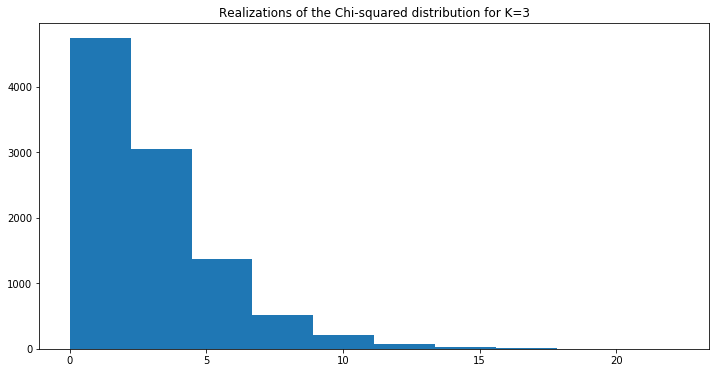

In [14]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.hist(x)
ax.set_title("Realizations of the Chi-squared distribution for K=3")

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

In [15]:
print("Mean:     {:.3f}".format(x.mean()))
print("Variance: {:.3f}".format(x.var()))

Mean:     3.017
Variance: 5.969


**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

In [16]:
def confidence_intervals(m=500, n=100):
    # Set up vars
    k = 3
    cover_mean = 0
    retset = []
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ci_sample_size = 50
    
    # Generate CI's
    for ii in range(m):
        # Get a sample of size n from chi2
        x = chi2.rvs(k, size=n)
        # Calculate mean, standard deviation
        xbar = x.mean()
        std = x.std()
        # Get zalpha, margin
        zalpha = stats.norm.ppf(0.975)
        margin = zalpha * (std / np.sqrt(n))
        # Compute CI
        minCI = xbar - margin
        maxCI = xbar + margin    
        # Determine if the mean is in the CI
        if minCI <= k and k <= maxCI:
            cover_mean += 1
        retset.append([minCI, maxCI])
        
    # Get a sample of CI's from the generated set of m CI's
    sampleIdx = np.random.choice(m, ci_sample_size)
    sampleCI = np.take(retset, sampleIdx, axis=0)
    
    # Plot the sampled CI's
    for ii in range(ci_sample_size):
        ax.plot([ii,ii], sampleCI[ii])
    ax.plot([0,ci_sample_size], [k,k], ls='--')
    ax.set_title('95% Confidence Intervals for the mean of a Chi-squared distribution')
    ax.set_xlabel('Sample CI')
    ax.set_ylabel('CI Range')
    
    print('Percentage of confidence intervals which contain the mean: {:.1%}'.format(cover_mean / m))

Percentage of confidence intervals which contain the mean: 95.2%


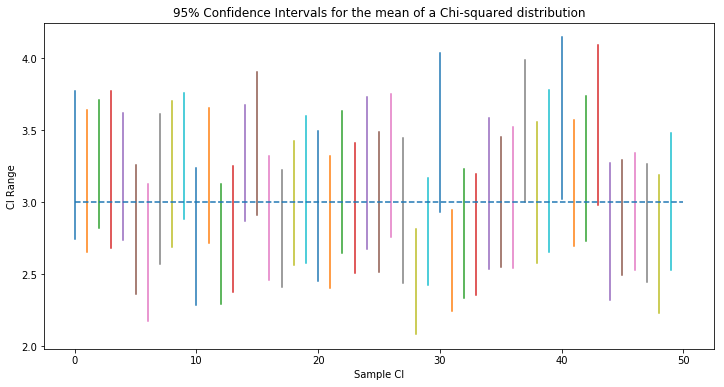

In [17]:
confidence_intervals()

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Roughly $95\%$ of the generated confidence intervals cover the true mean, which is exactly what we would expect from a $95\%$ confidence interval, so yes, this does agree with the theory covered in class. That is the exact definition of a $95\%$ CI: over many samples of confidence intervals, approximately $95\%$ of them will contain the true mean.

### [15 points] Problem 5 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [18]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you his solution to the problem which is shown below: 

In [19]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to his own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above. 

In [20]:
def autograder(pf, st, alpha=0.05):
    passed = False
    m = len(pf)
    n = len(st)
    
    pfmean = pf[0]
    stmean = st[0]
    pfvar = np.var(pf[1])
    stvar = np.var(st[1])
    
    zao2 = stats.norm.ppf(1-alpha/2)
    diff = pfmean - stmean
    margin = zao2 * np.sqrt( pfvar/m + stvar/n )
    minCI = diff - margin
    maxCI = diff + margin
    
    if minCI <= 0 and 0 <= maxCI:
        return "Passed"
    else:
        return "Failed"

In [21]:
students = (student1(), student2(), student3())
pf = prof()
for s in students:
    result = autograder(pf, s)
    print(result)

Passed
Passed
Passed


The autograder generates a confidence interval based on the difference between the mean of the professor's sample and the student's sample using the formula:
$$
\bar X - \bar Y ± Z_{\alpha/2} \ \sqrt{ \frac{\sigma^2_1}{m} + \frac{\sigma^2_2}{n} }
$$
If $0$ is present within the CI, it can be reasonably assumed that both samples came from the same distribution and the student passes. If $0$ is outside the CI, the student's code likely created a different distribution from the professor's and the student fails.

**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    

### [15 points] Problem 6 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the third Jack.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes. Compute the mean, median, and mode for this dataset, indicate them on the plot too. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

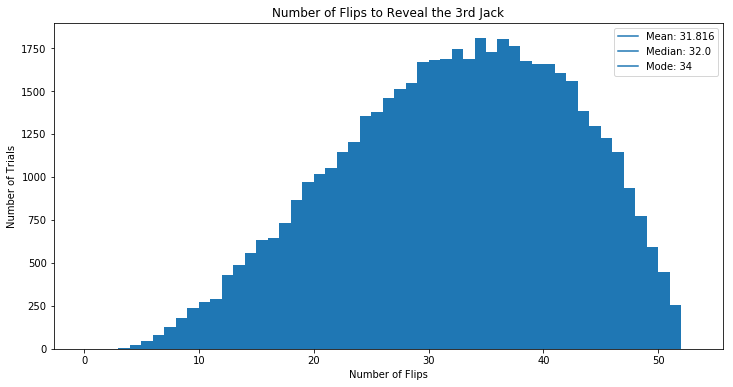

In [60]:
from matplotlib.patches import mlines

def flip_cards():
    cards = ['2','3','4','5','6','7','8','9','10','J','Q','K','A'] * 4
    np.random.shuffle(cards)
    j_count = 0
    flip_count = 0
    for card in cards:
        flip_count += 1
        if card == 'J':
            j_count += 1
        if j_count == 3:
            break
    return flip_count

num_trials = 50000
flips = [ flip_cards() for i in range(num_trials) ]

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(flips, bins=range(54))
ax.set_title('Number of Flips to Reveal the 3rd Jack')
ax.set_xlabel('Number of Flips')
ax.set_ylabel('Number of Trials')

mean = np.mean(flips)
median = np.median(flips)
mode = stats.mode(flips)[0][0]

lmean = mlines.Line2D([], [], label='Mean: {:.3f}'.format(mean))
lmedian = mlines.Line2D([], [], label='Median: {:.1f}'.format(median))
lmode = mlines.Line2D([], [], label='Mode: {:d}'.format(mode))
ax.legend(handles=[lmean, lmedian, lmode])

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Jerry Ferguson and Steve Ferguson. You prepare to take anotter shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

The 99% CI is larger than the 95% CI because if we are saying with a higher degree of confidence that a certain value lies within the CI, then we must expand that range to caputre a larger number of possible values. Put another way, a 100% CI would have to be infinitely wide because we can only be 100% sure that our value lies within a range if that range contains all values.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the game. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the standard deviation.
***

In [22]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [87]:
a = 0.05
n = len(durant)
s = np.std(durant)
chi2_low = stats.chi2.ppf(a/2, n-1)
chi2_high = stats.chi2.ppf(1-a/2, n-1)
maxCI = np.sqrt(((n-1)*(s**2))/chi2_low**2)
minCI = np.sqrt(((n-1)*(s**2))/chi2_high**2)
print('[{:.3f}, {:.3f}]'.format(minCI, maxCI))

[0.017, 0.120]


**Part D**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Maureen Ferguson. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. Ferguson suggests that you do the following CSCI3022 problem:</font>

You collect 53 samples of hair from baby river otters and find that they are, on average, 22.6 mm long, with a standard devaition of 15.2mm. 

Then you collect 41 samples of hair from baby sea otters and find that they are, on average, 26.4 mm long, with a standard deviation of 11.4 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby sea otter hair length exceeds the true mean of baby river otter hair length by more than 3 mm?  Use a test of your choice.

***

$$
\bar W = \bar X - \bar Y = 26.4 - 22.6 \\
\bar W - 3 ± Z_{\alpha/2} \ \sqrt{ \frac{\sigma_X^2}{m} + \frac{\sigma_Y^2}{n} } \\
3.800 - 3 ± 1.96 \ \sqrt{ \frac{15.2^2}{53} + \frac{11.4^2}{41} } \\
0.800 ± 5.378 = [-4.578, 6.178]
$$

Because the 95% CI for the difference minus three contains zero, it is likely that the true mean of baby sea otter hair length exceeds the true mean of baby river otter hair length by more than 3 mm.

In [70]:
diff = 26.4 - 22.6
diff3 = diff - 3
margin = 1.96 * np.sqrt( (15.2**2)/53 + (11.4**2)/41 )
print('[{:.3f}, {:.3f}]'.format(diff3 - margin, diff3 + margin))

[-4.578, 6.178]


**Part E**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

We would rather have a low Type II error rate because that means that we rarely fail to reject the null hypothesis when it is in fact not true. In this case,a Type II error would mean that we assesed the strength of the carbon fiber as being above tolerance when it is actually below it.